In [14]:
# Authors: N. Branson, M. Occhetta., A. Wenteler

In [33]:
import numpy as np
import pandas as pd
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from pypalettes import load_cmap
import mpl_sizes

formatter = mpl_sizes.get_format("NeurIPS") # options: ICLR, ICML, NeurIPS, InfThesis

In [55]:
# These results are produced by running `train.py` in conjunction with the corresponding scFM
# df_mlp = pd.read_csv('aggregated_results/2-gene/mlp_baseline.csv')
# df_scbert = pd.read_csv('aggregated_results/2-gene/scbert.csv')
# df_scgpt = pd.read_csv('aggregated_results/2-gene/scgpt.csv')
# df_gf = pd.read_csv('aggregated_results/2-gene/geneformer.csv')
# df_uce = pd.read_csv('aggregated_results/2-gene/uce.csv')
# df_mean = pd.read_csv('aggregated_results/2-gene/mean.csv')
# df_scf = pd.read_csv('aggregated_results/2-gene/scfoundation.csv')

df_mlp = pd.read_csv('individual_results/2-gene/raw_exp.csv')
df_scbert = pd.read_csv('individual_results/2-gene/scbert.csv')
df_scgpt = pd.read_csv('individual_results/2-gene/scgpt.csv')
df_gf = pd.read_csv('individual_results/2-gene/gf.csv')
df_uce = pd.read_csv('individual_results/2-gene/uce.csv')
df_mean = pd.read_csv('individual_results/2-gene/mean.csv')
df_scf = pd.read_csv('individual_results/2-gene/scfoundation.csv')

In [56]:
df_mean

,Name,Created,End Time,Runtime,Tags,ID,State,Notes,User,Group,...,trainer.default_root_dir,trainer.deterministic,trainer.devices,trainer.inference_mode,trainer.max_epochs,trainer.min_epochs,trainer.num_sanity_val_steps,de_test/baseline_mse,epoch,trainer/global_step
0,helpful-rain-6184,2024-10-01T14:03:46.000Z,2024-10-01T14:05:03.000Z,77,"ELMSAN1+LHX1, eval, mean, norman_2, replicate_...",9uic17mb,finished,-,NaN,test_mean_norman_0.1,...,${paths.output_dir},False,1,True,20,1,0,NaN,0.0,0.0
1,scarlet-smoke-6337,2024-10-01T14:53:28.000Z,2024-10-01T14:54:08.000Z,40,"BPGM+SAMD1, eval, mean, norman_2, replicate_0,...",g45f4ju6,finished,-,NaN,test_mean_norman_0.7,...,${paths.output_dir},False,1,True,20,1,0,NaN,0.0,0.0
2,true-cosmos-6256,2024-10-01T14:34:06.000Z,2024-10-01T14:35:00.000Z,54,"S1PR2+SGK1, eval, mean, norman_2, replicate_1,...",b95w5on6,finished,-,NaN,test_mean_norman_0.2,...,${paths.output_dir},False,1,True,20,1,0,NaN,0.0,0.0
3,young-snowball-6255,2024-10-01T14:34:06.000Z,2024-10-01T14:35:03.000Z,57,"CBL+UBASH3B, eval, mean, norman_2, replicate_1...",nywk58w8,finished,-,NaN,test_mean_norman_0.2,...,${paths.output_dir},False,1,True,20,1,0,NaN,0.0,0.0
4,dutiful-star-6268,2024-10-01T14:37:38.000Z,2024-10-01T14:38:39.000Z,61,"KLF1+TGFBR2, eval, mean, norman_2, replicate_2...",c74yx3wh,finished,-,NaN,test_mean_norman_0.2,...,${paths.output_dir},False,1,True,20,1,0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,astral-dragon-6327,2024-10-01T14:50:58.000Z,2024-10-01T14:51:33.000Z,35,"CEBPE+FOSB, eval, mean, norman_2, replicate_1,...",3puy1par,finished,-,NaN,test_mean_norman_0.6,...,${paths.output_dir},False,1,True,20,1,0,NaN,NaN,NaN
234,sage-pond-6183,2024-10-01T14:02:57.000Z,2024-10-01T14:04:28.000Z,91,"RHOXF2+ZBTB25, eval, mean, norman_2, replicate...",3nr4npvb,finished,-,NaN,test_mean_norman_0.0,...,${paths.output_dir},False,1,True,20,1,0,NaN,NaN,NaN
235,ethereal-lion-6146,2024-10-01T13:35:02.000Z,2024-10-01T13:36:49.000Z,107,"KLF1+MAP2K6, eval, mean, norman_2, replicate_1...",zjahb0c9,finished,-,NaN,test_mean_norman_0.0,...,${paths.output_dir},False,1,True,20,1,0,NaN,NaN,NaN
236,legendary-leaf-6161,2024-10-01T13:48:38.000Z,2024-10-01T13:50:16.000Z,98,"FOXF1+HOXB9, eval, mean, norman_2, replicate_2...",zmzv1t0j,finished,-,NaN,test_mean_norman_0.0,...,${paths.output_dir},False,1,True,20,1,0,NaN,NaN,NaN


## Plotting and data processing functions

In [57]:
df_scf

,Name,Created,End Time,Runtime,Tags,ID,State,Notes,User,Group,...,trainer.default_root_dir,trainer.deterministic,trainer.devices,trainer.inference_mode,trainer.max_epochs,trainer.min_epochs,trainer.num_sanity_val_steps,de_test/baseline_mse,epoch,trainer/global_step
0,peachy-yogurt-6582,2024-10-01T19:59:41.000Z,2024-10-01T20:00:17.000Z,36,"BPGM+SAMD1, eval, norman_2, replicate_1, scfou...",hkq0xmsp,finished,-,NaN,test_mean_norman_0.7,...,${paths.output_dir},False,1,True,20,1,0,NaN,0.0,0.0
1,wild-fire-6581,2024-10-01T19:59:35.000Z,2024-10-01T20:00:17.000Z,42,"FEV+ISL2, eval, norman_2, replicate_2, scfound...",aq1bgbrv,finished,-,NaN,test_mean_norman_0.7,...,${paths.output_dir},False,1,True,20,1,0,NaN,NaN,NaN
2,drawn-moon-6580,2024-10-01T19:58:41.000Z,2024-10-01T20:00:00.000Z,79,"MAP2K3+MAP2K6, eval, norman_2, replicate_1, sc...",c1wuh0f3,finished,-,NaN,test_mean_norman_0.7,...,${paths.output_dir},False,1,True,20,1,0,NaN,0.0,0.0
3,comic-resonance-6583,2024-10-01T20:01:54.000Z,2024-10-01T20:02:32.000Z,38,"KLF1+MAP2K6, eval, norman_2, replicate_2, scfo...",mqy7cpx1,finished,-,NaN,test_mean_norman_0.7,...,${paths.output_dir},False,1,True,20,1,0,NaN,NaN,NaN
4,wise-spaceship-6576,2024-10-01T19:55:47.000Z,2024-10-01T19:56:25.000Z,38,"BPGM+SAMD1, eval, norman_2, replicate_0, scfou...",stmt2iq9,finished,-,NaN,test_mean_norman_0.7,...,${paths.output_dir},False,1,True,20,1,0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,exalted-dew-6401,2024-10-01T17:08:28.000Z,2024-10-01T17:10:31.000Z,123,"BCL2L11+TGFBR2, eval, norman_2, replicate_2, s...",zjpvjkrj,finished,-,NaN,test_mean_norman_0.0,...,${paths.output_dir},False,1,True,20,1,0,NaN,0.0,0.0
234,deft-pine-6382,2024-10-01T16:46:50.000Z,2024-10-01T16:48:35.000Z,105,"PTPN12+UBASH3B, eval, norman_2, replicate_1, s...",a75kxpog,finished,-,NaN,test_mean_norman_0.0,...,${paths.output_dir},False,1,True,20,1,0,NaN,NaN,NaN
235,young-flower-6378,2024-10-01T16:42:12.000Z,2024-10-01T16:44:01.000Z,109,"ELMSAN1+MAP2K6, eval, norman_2, replicate_1, s...",9lhdyq87,finished,-,NaN,test_mean_norman_0.0,...,${paths.output_dir},False,1,True,20,1,0,NaN,0.0,0.0
236,bright-thunder-6388,2024-10-01T16:52:46.000Z,2024-10-01T16:54:34.000Z,108,"FOXA1+FOXF1, eval, norman_2, replicate_1, scfo...",044qbgro,finished,-,NaN,test_mean_norman_0.0,...,${paths.output_dir},False,1,True,20,1,0,NaN,NaN,NaN


In [58]:
spectral_params = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7'] #'0.8']
def find_mets_by_spectral_params(model, metric_name, raw_data):
    '''find tabular metrics grouped by the spectral params'''
    met_by_sp = {}
    for sp in spectral_params:
        debug_check = f"{model}_{sp}"
        if model in ['mlp_norman']:
            sp_sub = raw_data[raw_data['Group'] == f'{model}_{sp}']
        else:            
            sp_sub = raw_data[raw_data['data.split'] == float(sp)]
        # if sp_sub[metric_name].isna().all():
        #     met_by_sp[f'{model}_{sp}'] = sp_sub['test/rmse'].values
        # else:
        #if we have missing runs add nan
        sp_sub = sp_sub[metric_name].values
        if len(sp_sub) < 3:
            num_nan = 3 - len(sp_sub)
            sp_sub = np.append(sp_sub, [np.nan] * num_nan)
        met_by_sp[f'{model}_{sp}'] = sp_sub

    return pd.DataFrame(met_by_sp)

def find_spectral_auc(metric_df):
    x = np.array(spectral_params, dtype='float')
    y = metric_df.mean() 
    yerr = metric_df.std() / np.sqrt(3)
    mean_yerr = yerr.mean()
    return auc(x, y), mean_yerr

def plot_spectral_curve(metric_df, err='standard_error', zero_ylb=False, shading=True, errbar=True, c="#D1E7FF", alpha=0.8,
                        plot_shading_c_same=True):
    x = np.array(spectral_params, dtype='float')
    y = metric_df.mean()
    
    yerr = metric_df.std() / np.sqrt(3)
    
    if errbar: #safe to remove if we go with fill_between for errors
        plt.errorbar(x, y, yerr=yerr, color='k', capsize = 3,elinewidth=1.5, linewidth=1.0)    
    else:
        if plot_shading_c_same:
            plot_c = c
        else:
            plot_c = 'k'
        plt.plot(x, y, color=plot_c, linestyle='dashed', marker='o', linewidth=0.5)
        y_lower = y - yerr
        y_upper = y + yerr
        plt.fill_between(x, y_lower, y_upper, color=c, alpha=alpha, 
        #edgecolor='#aad3ff'
        )
    axes = plt.gca()
    y_min, _ = axes.get_ylim()
    #
    if zero_ylb:
        y_min = 0
    if shading:
        plt.fill_between(x=x, y1=y, y2=y_min, color= "#D1E7FF", alpha=1.0)
    
    plt.xlabel('Sparsification Probability')
    plt.ylabel('MSE')


def find_auspc_table(all_model_raw_dfs, model_names, probe_model_ds='mlp_norman', metric_name='test/mse'):
    '''probe_model_ds named in Group col in df above 
    metric_name  name of col for metric of intrest
    '''
    table_auc = {}
    table_yerr = {}
    for m_name, dft in zip(model_names, all_model_raw_dfs):
        #print(m_name)
        if m_name != 'Mean baseline':
            auc, yerr = find_spectral_auc(find_mets_by_spectral_params(m_name, metric_name, dft))  #changed to m_name n.b
        else:
            auc, yerr = find_spectral_auc(find_mets_by_spectral_params("test_mean_norman", metric_name, dft))
            
        table_auc[m_name] = auc
        table_yerr[m_name] = yerr
    return table_auc, table_yerr

## AUSPC bar plot for all models

In [59]:
#auc_table, yerr_table = find_auspc_table([df_mlp, df_scbert, df_scgpt, df_gf, df_uce, df_mean, df_scf], model_names=['MLP gene expression', 'scbert']), #'scbert', 'scgpt', 'gf', 'uce', 'Mean baseline', 'scfoundation'])

#auc_table, yerr_table = find_auspc_table([df_mlp, df_scbert], model_names=['MLP gene expression', 'scbert'])
#auc_table, yerr_table = find_auspc_table([df_mlp, df_scbert, df_scgpt, df_gf, df_uce, df_mean, df_scf], model_names=['MLP gene expression', 'scbert', 'scgpt', 'gf', 'uce', 'Mean baseline', 'scfoundation'])

#auc_table, yerr_table = find_auspc_table([df_mlp, df_scbert, df_scgpt, df_gf, df_uce, df_mean], model_names=['MLP gene expression', 'scbert', 'scgpt', 'gf', 'uce', 'Mean baseline'])

auc_table, yerr_table = find_auspc_table([df_mlp, df_scbert, df_scgpt, df_gf, df_uce, df_mean, df_scf], model_names=['MLP gene expression', 'scbert', 'scgpt', 'gf', 'uce', 'Mean baseline', 'scfoundation'])

auc_table = pd.Series(auc_table).sort_values()
auc_table

ValueError: All arrays must be of the same length

In [60]:
yerr_table

{'MLP gene expression': 0.004150390465422065,
 'scbert': 0.004570283752050753,
 'scgpt': 0.0060131530098597175,
 'gf': 0.004511259959832415,
 'uce': 0.004710628334964282,
 'Mean baseline': 0.004181713273304058,
 'scfoundation': 0.004666945560318987}

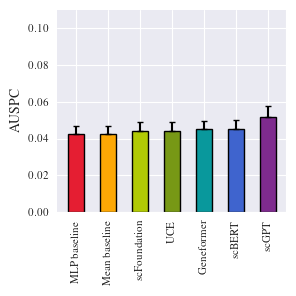

In [40]:
plt.figure(figsize=(3, 3))
table, yerr = find_auspc_table([df_mean, df_mlp, df_scbert, df_scgpt, df_gf, df_uce, df_scf], model_names=['Mean baseline', 'MLP baseline', 'scBERT', 'scGPT', 'Geneformer', 'UCE', 'scFoundation'])
#table, yerr = find_auspc_table([df_mean, df_mlp, df_scbert, df_scgpt, df_gf, df_uce], model_names=['Mean baseline', 'MLP baseline', 'scBERT', 'scGPT', 'Geneformer', 'UCE'])

table = pd.Series(table).sort_values()

yerr_values = [yerr[model] for model in table.index]

#cmap = load_cmap('Flourite')
cmap = load_cmap('Rainbow')
#cmap = load_cmap('RoseQuartz')
#cmap = load_cmap('Sardonyx')
# cmap = plt.cm.get_cmap('tab20b', len(table)) 

bar_colors = [cmap(i/6) for i in range(7)]
    
width = 0.5

yerr_top_only = ([0] * len(yerr_values), yerr_values)

# Add error bars to the bar plot
bars = plt.bar(table.index, table, width, color=bar_colors, 
               alpha=1.0, yerr=yerr_top_only, capsize=2, linewidth=1, edgecolor='black', 
               ecolor='black')

plt.ylabel('AUSPC')
plt.xticks(rotation=90)
plt.ylim(0.0, 0.11)

ax = plt.gca()
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('paper_figs/auspc_bar_1.pdf', dpi=300)
plt.show()

## MSE per split / AUSPC bar plot for all models

In [41]:
test_mse = find_mets_by_spectral_params('MLP gene expression', 'test/mse', df_mlp)
test_mse_uce = find_mets_by_spectral_params('uce', 'test/mse', df_uce)
test_mse_gf = find_mets_by_spectral_params('gf', 'test/mse', df_gf)
test_mse_scgpt = find_mets_by_spectral_params('scgpt', 'test/mse', df_scgpt)
test_mse_scbert = find_mets_by_spectral_params('scbert', 'test/mse', df_scbert)
test_mse_scf = find_mets_by_spectral_params('scfoundation', 'test/mse', df_scf)
test_mse_mean = find_mets_by_spectral_params('test_mean_norman', 'test/mse', df_mean)

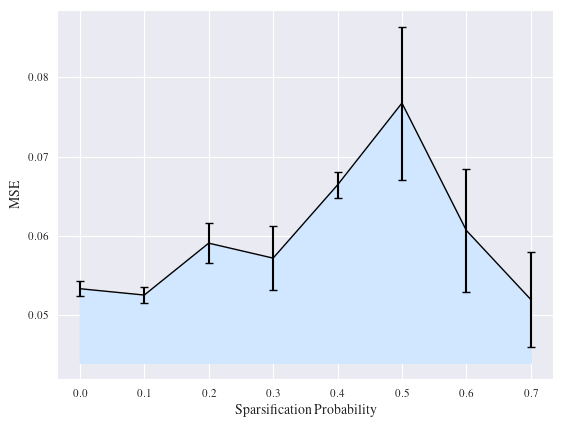

In [42]:
plot_spectral_curve(test_mse_mean, shading=True, errbar=True, plot_shading_c_same=False)
plt.savefig('paper_figs/full_spec_curve_mean.pdf', dpi=300)

## MSE bar plot for all models

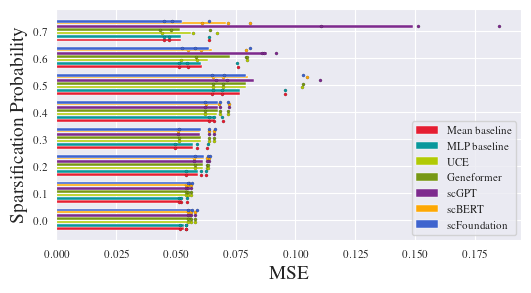

In [43]:
model_names = ['Mean baseline', 'MLP baseline', 'UCE', 'Geneformer', 'scGPT', 'scBERT', 'scFoundation']
model_mses = [test_mse_mean, test_mse, test_mse_uce, test_mse_gf, test_mse_scgpt, test_mse_scbert, test_mse_scf]

spectral_params = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7'] 
x_labels = spectral_params
bars = []

dists_from_cent = [-1.25, -0.75, -0.25, 0.25, 0.75, 1.25, 1.5]  
plt.figure(figsize=(6, 3))

assert len(dists_from_cent) == len(model_names)
pivot = np.arange(len(x_labels)) # pivot points for bars/ticks

# Use the custom dark blue colormap
#cmap = load_cmap('Flourite')
cmap = load_cmap('Rainbow')
#cmap = load_cmap('RoseQuartz')
#cmap = load_cmap('Sardonyx')
# cmap = plt.cm.get_cmap('tab20b', len(table)) 
bar_colors = [cmap(i/6) for i in range(7)]
width = 0.5

model_colors = {
    'MLP baseline': bar_colors[4],
    'Mean baseline': bar_colors[0],
    'scBERT': bar_colors[1],
    'UCE': bar_colors[2],
    'Geneformer': bar_colors[3],
    'scGPT': bar_colors[6],
    'scFoundation': bar_colors[5]
}

width = 0.1
for model, m_mse, dis_from_cent in zip(model_names, model_mses, dists_from_cent):
    c = model_colors[model]
    y = m_mse.mean()
    bar = [p + (dis_from_cent * width * 2.5) for p in pivot]
    bars.append(bar)
    plt.barh(bar, y, width, alpha=1.0,
    label=model,
    color=c,
    linewidth=0.3,  
    ecolor='black'
    )
    for rep in m_mse.iterrows():
        plt.scatter(rep[1], bar, color=c, edgecolors='black', linewidths=0.1, s=5)

plt.yticks(np.arange(8), spectral_params) #rotation='vertical')
plt.xlabel('MSE', fontsize=14)
plt.ylabel('Sparsification Probability', fontsize=14)
plt.legend(loc='lower right', fontsize=8)

#plt.savefig('paper_figs/bar_all_sp_mse.pdf', dpi=300)
plt.show()


In [44]:
size = formatter.line_width_plot(aspect_ratio="wide")
print(size)

(5.50107, 2.3576014285714284)


In [45]:
test_mse_mean

,test_mean_norman_0.0,test_mean_norman_0.1,test_mean_norman_0.2,test_mean_norman_0.3,test_mean_norman_0.4,test_mean_norman_0.5,test_mean_norman_0.6,test_mean_norman_0.7
0,0.051507,0.052017,0.062716,0.049589,0.065966,0.065122,0.075978,0.063830
1,0.054320,0.054549,0.054187,0.058903,0.063807,0.069260,0.051134,0.047101
2,0.054289,0.051150,0.060411,0.063173,0.069532,0.095833,0.055013,0.045110


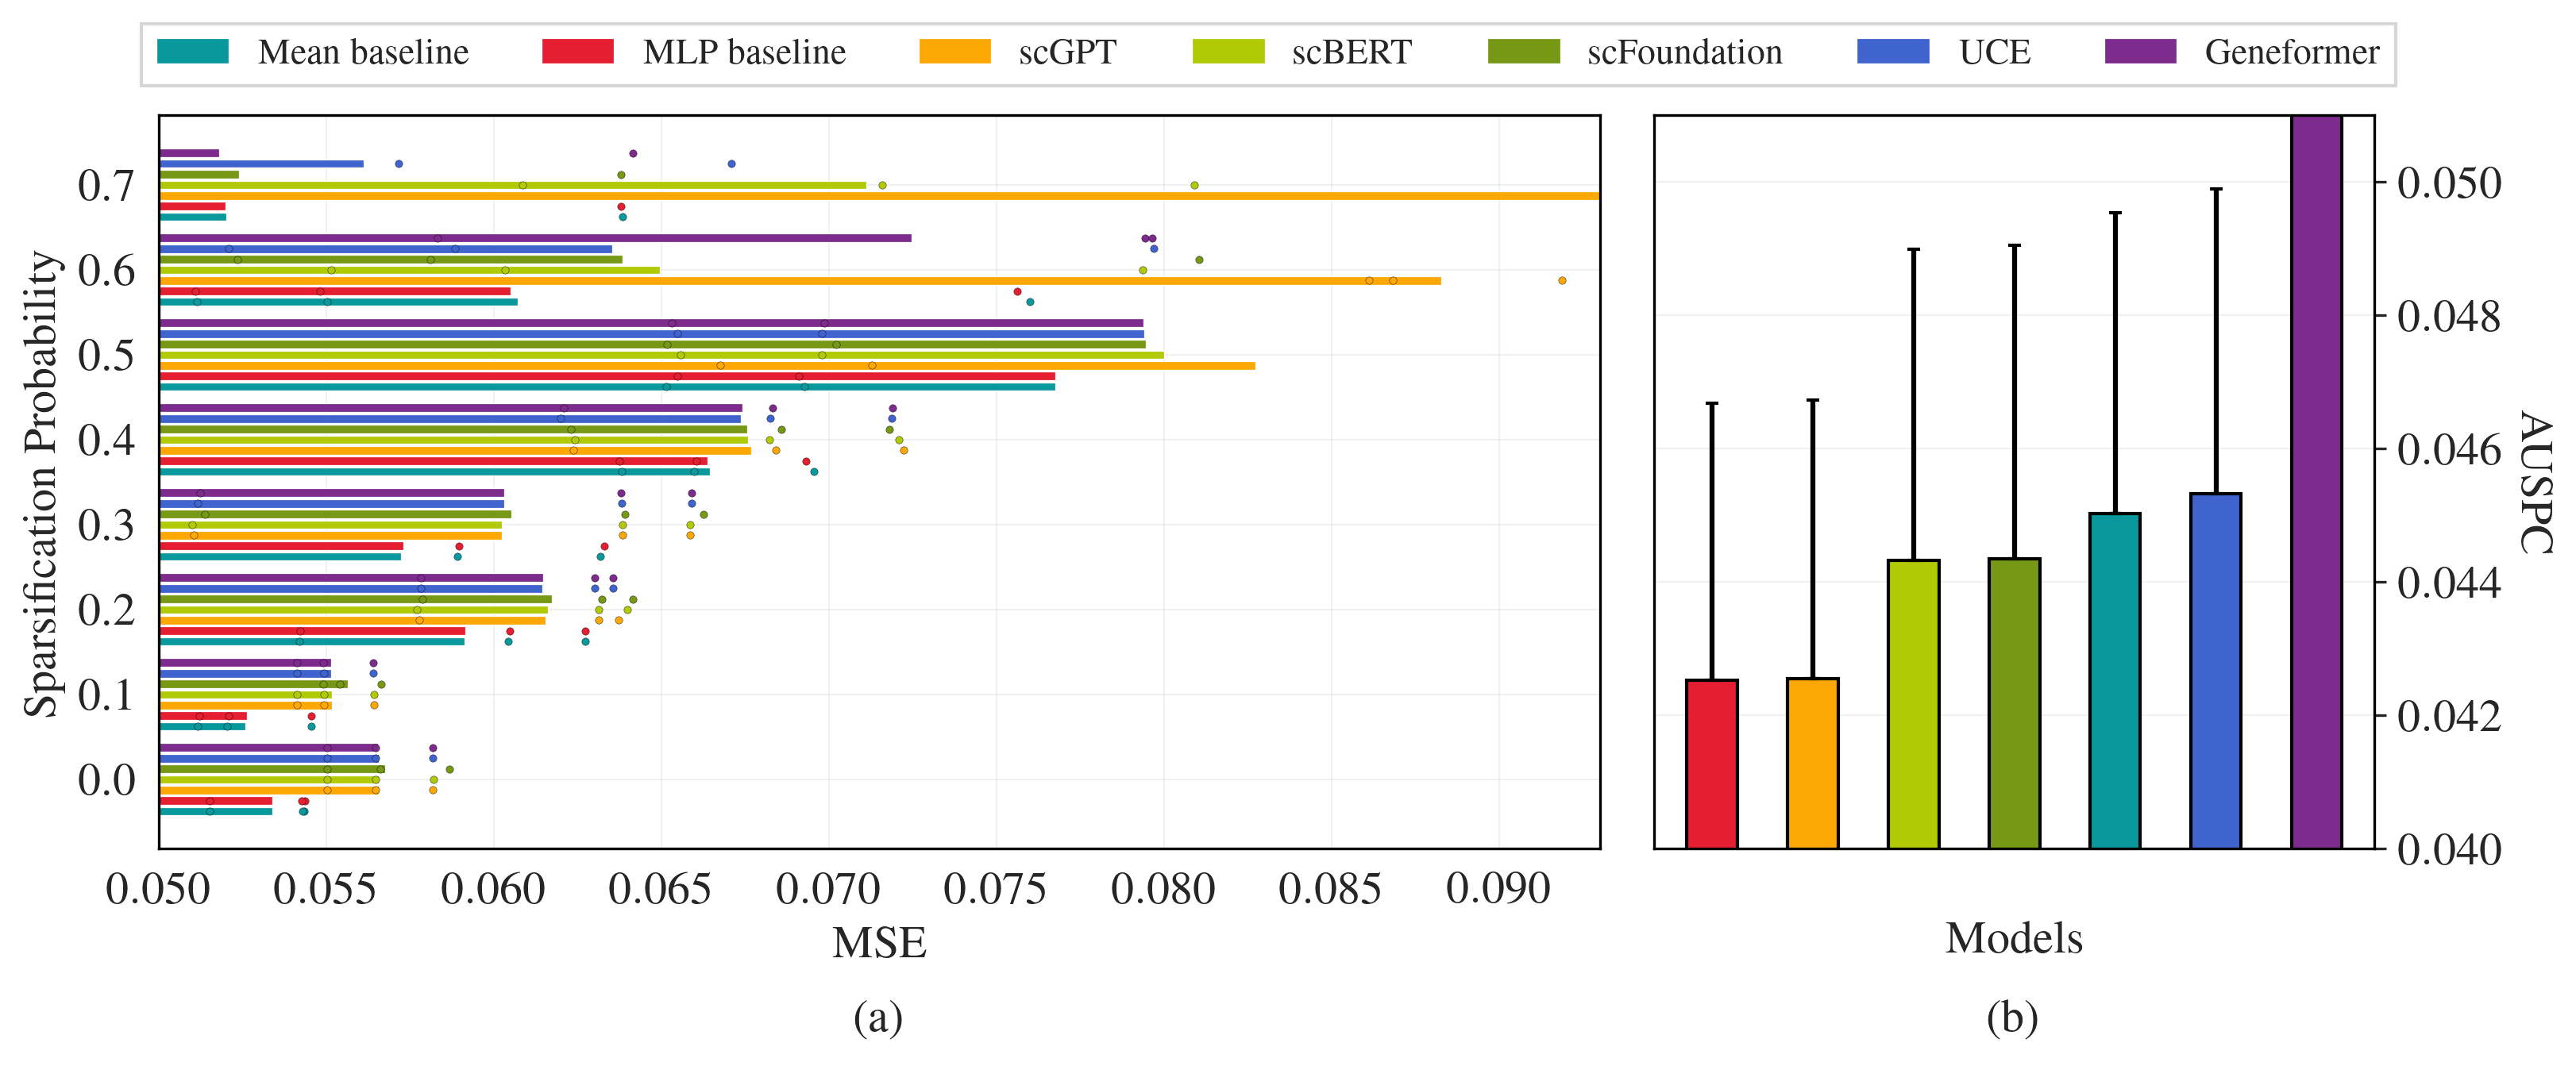

In [46]:
#sub pltos of the above
model_names = ['Mean baseline', 'MLP baseline', 'scGPT','scBERT', 'scFoundation', 'UCE', 'Geneformer']
model_mses = [test_mse_mean, test_mse, test_mse_scgpt, test_mse_scbert, test_mse_scf, test_mse_uce, test_mse_gf]

size = formatter

spectral_params = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7'] 
x_labels = spectral_params


fig, ax = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [2, 1]}, dpi=300)  # 1x2 grid of subplots
plt.subplots_adjust(wspace=0.05)

cmap = load_cmap('Rainbow') 
bar_colors = [cmap(i/6) for i in range(7)]

model_colors = {    
    'Geneformer': bar_colors[6],
    'UCE': bar_colors[5],
    'Mean baseline': bar_colors[4],
    'scFoundation': bar_colors[3],
    'scBERT': bar_colors[2],
    'scGPT': bar_colors[1],
    'MLP baseline': bar_colors[0]
}

# Plot on the first subplot (a)
bars = []

dists_from_cent = [-1.5, -1.0, -0.5, 0,  0.5, 1.0, 1.5]  #for 5 modles needs to be manulaly set for anotehr n modles amount

assert len(dists_from_cent) == len(model_names)
pivot = np.arange(len(x_labels)) # pivot points for bars/ticks

width = 0.1
for model, m_mse, dis_from_cent in zip(model_names, model_mses, dists_from_cent):
    c = model_colors[model]
    y = m_mse.mean()
    bar = [p + (dis_from_cent * width * 2.5) for p in pivot]
    bars.append(bar)
    ax[0].barh(bar, y, width, alpha=1.0,
    label=model,
    color=c,
    linewidth=0.3,  
    ecolor='black'
    )
    for rep in m_mse.iterrows():
        ax[0].scatter(rep[1], bar, color=c, edgecolors='black', linewidths=0.1, s=5)

ax[0].set_yticks(np.arange(8), spectral_params, fontsize=14) #rotation='vertical')
ax[0].set_xlabel('MSE', fontsize=14)
ax[0].set_ylabel('Sparsification Probability', fontsize=14)
ax[0].set_xlim(0.05, 0.093)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].set_facecolor('white')
ax[0].grid(axis='both', color='grey', linestyle='solid', linewidth=0.05)
for spine in ax[0].spines.values():
    spine.set_color('black')

# # Plot on the second subplot (b)

table, yerr = find_auspc_table([df_mean, df_mlp, df_scbert, df_scgpt, df_gf, df_uce, df_scf], model_names=['Mean baseline', 'MLP baseline', 'scBERT', 'scGPT', 'Geneformer', 'UCE', 'scFoundation'])

table = pd.Series(table).sort_values()

yerr_values = [yerr[model] for model in table.index]

cmap = load_cmap('Rainbow') 
    
width = 0.5

yerr_top_only = ([0] * len(yerr_values), yerr_values)

# Add error bars to the bar plot~
bars = ax[1].bar(table.index, table, width, color=bar_colors, 
               alpha=1.0, yerr=yerr_top_only, capsize=2, linewidth=1, edgecolor='black', 
               ecolor='black')

ax[1].set_ylabel('AUSPC', fontsize=14, rotation=-90, labelpad=15)
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
ax[1].set_xlabel('Models', fontsize=14, labelpad=22)
plt.xticks([])
ax[1].tick_params(axis='y', labelsize=14)
ax[1].set_ylim(0.04, 0.051)
ax[1].grid(color='grey', linewidth=0.05)
ax[1].set_facecolor('white')
for spine in ax[1].spines.values():
    spine.set_color('black')
lgd = ax[0].legend(loc='upper center', bbox_to_anchor=(0.77, 1.15), ncol=7, fancybox=False, shadow=False, fontsize=11, facecolor='white')
# plt.tight_layout(rect=[1, -1, 0, 0])

annotation_1 = ax[0].text(0.5, -0.25, '(a)', transform=ax[0].transAxes, ha='center', fontsize=14)
annotation_2 = ax[1].text(0.5, -0.25, '(b)', transform=ax[1].transAxes, ha='center', fontsize=14)

plt.savefig('paper_figs/bar_all_sp_mse_fig.pdf', bbox_extra_artists=(lgd, annotation_1, annotation_2,), bbox_inches='tight', dpi=300)

## Tables with MSE results

In [47]:
model_mses

[   test_mean_norman_0.0  test_mean_norman_0.1  test_mean_norman_0.2  \
 0              0.051507              0.052017              0.062716   
 1              0.054320              0.054549              0.054187   
 2              0.054289              0.051150              0.060411   
 
    test_mean_norman_0.3  test_mean_norman_0.4  test_mean_norman_0.5  \
 0              0.049589              0.065966              0.065122   
 1              0.058903              0.063807              0.069260   
 2              0.063173              0.069532              0.095833   
 
    test_mean_norman_0.6  test_mean_norman_0.7  
 0              0.075978              0.063830  
 1              0.051134              0.047101  
 2              0.055013              0.045110  ,
    MLP gene expression_0.0  MLP gene expression_0.1  MLP gene expression_0.2  \
 0                 0.054356                 0.051203                 0.062710   
 1                 0.051504                 0.052084         

In [49]:
all_mean = {}
all_sd = {}
for m_name, m_mses in zip(model_names, model_mses):
    m_ave_mse = m_mses.mean(axis=0)
    m_sd_mse = m_mses.std(axis=0)
    new_idx = pd.Index([idx.split('_')[-1] for idx in m_ave_mse.index])
    m_ave_mse.index = new_idx
    m_sd_mse.index = new_idx
    all_mean[m_name] = pd.DataFrame(m_ave_mse)
    all_sd[m_name] = pd.DataFrame(m_sd_mse)

all_mean_df = pd.concat(all_mean, axis=1)
all_sd_df = pd.concat(all_sd, axis=1)
all_mean_df.columns = model_names
all_sd_df.columns = model_names
all_mean_df = all_mean_df.T
all_sd_df = all_sd_df.T

In [50]:
all_mean_df

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7
Mean baseline,0.053372,0.052572,0.059104,0.057222,0.066435,0.076738,0.060708,0.052014
MLP baseline,0.053372,0.052608,0.059126,0.057284,0.066354,0.076752,0.060496,0.051983
scGPT,0.056541,0.055147,0.061528,0.060233,0.067663,0.082718,0.088260,0.149056
scBERT,0.056551,0.055148,0.061591,0.060222,0.067569,0.079994,0.064930,0.071101
scFoundation,0.056750,0.055636,0.061730,0.060499,0.067553,0.079435,0.063819,0.052383
UCE,0.056546,0.055142,0.061445,0.060289,0.067359,0.079387,0.063521,0.056115
Geneformer,0.056539,0.055135,0.061449,0.060293,0.067418,0.079373,0.072458,0.051785


In [51]:
all_sd_df


,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7
Mean baseline,0.001615,0.001766,0.004412,0.006947,0.002891,0.016665,0.013365,0.010282
MLP baseline,0.001619,0.001728,0.004414,0.006966,0.002788,0.016511,0.013216,0.010268
scGPT,0.001574,0.001160,0.003276,0.008031,0.004967,0.023854,0.003147,0.037312
scBERT,0.001588,0.001160,0.003399,0.008054,0.004865,0.021474,0.012752,0.010034
scFoundation,0.001830,0.000886,0.003395,0.008004,0.004833,0.020534,0.015180,0.010004
UCE,0.001574,0.001146,0.003168,0.007973,0.005003,0.020510,0.014386,0.011511
Geneformer,0.001573,0.001151,0.003160,0.007936,0.004966,0.020561,0.012246,0.010917


In [26]:
yerr

{'Mean baseline': 0.004181713273304058,
 'MLP baseline': 0.004150390465422065,
 'scBERT': 0.004570283752050753,
 'scGPT': 0.0060131530098597175,
 'Geneformer': 0.004511259959832415,
 'UCE': 0.004710628334964282,
 'scFoundation': 0.004666945560318987}

In [52]:
#'RdYlGn'
all_mean_df.style.background_gradient(cmap='RdYlGn_r', axis=1)

,Mean baseline,MLP baseline,scGPT,scBERT,scFoundation,UCE,Geneformer
0.0,0.059162,0.059345,0.059401,0.059680,0.059887,0.059371,0.059382
0.1,0.061770,0.062884,0.062369,0.063010,0.064205,0.062576,0.062574
0.2,0.059798,0.064101,0.063404,0.063407,0.063659,0.061320,0.061317
0.3,0.064974,0.066985,0.067647,0.067613,0.067927,0.065654,0.065652
0.4,0.062187,0.064525,0.063630,0.063633,0.064396,0.063870,0.063953
0.5,0.066585,0.059841,0.059255,0.059239,0.059193,0.065514,0.065496
0.6,0.074125,0.065018,0.064004,0.064507,0.067052,0.073704,0.073822
0.7,0.084295,0.070655,0.085057,0.084881,0.086005,0.084787,0.085245


In [25]:
all_mean_df

,MLP baseline,scGPT,scBERT,scFoundation,Mean baseline,UCE,Geneformer
0.0,0.059162,0.059345,0.059371,0.059382,0.059401,0.059680,0.059887
0.1,0.061770,0.062884,0.062576,0.062574,0.062369,0.063010,0.064205
0.2,0.059798,0.064101,0.061320,0.061317,0.063404,0.063407,0.063659
0.3,0.064974,0.066985,0.065654,0.065652,0.067647,0.067613,0.067927
0.4,0.062187,0.064525,0.063870,0.063953,0.063630,0.063633,0.064396
0.5,0.066585,0.059841,0.065514,0.065496,0.059255,0.059239,0.059193
0.6,0.074125,0.065018,0.073704,0.073822,0.064004,0.064507,0.067052
0.7,0.084295,0.066474,0.084787,0.085245,0.085057,0.084881,0.086005
